# Train K-Nearest Neighbor (KNN) Classifier

## Fetch MNIST Dataset 

In [2]:
import sklearn
from sklearn.datasets import fetch_openml
import numpy as np

In [3]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Split Data in Train and Test

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
#X= data, y= target
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
y.shape

(70000,)

In [6]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(weights='distance', n_neighbors=7)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [8]:
y_knn_pred = knn_classifier.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score_knn = accuracy_score(y_test, y_knn_pred)
accuracy_score_knn

0.9702857142857143

# Fine-tune Hyperparameters with Grid Search

In [10]:
from sklearn.model_selection import GridSearchCV
# #GridSearchCV for KNN runs long, so I commented it out

# param_grid_knn_classifier = [{'weights': ["uniform", "distance"], 
#                             'n_neighbors': [3, 4, 5, 6]}]

# knn_classifier_grid = KNeighborsClassifier()
# grid_search_knn = GridSearchCV(knn_classifier_grid, param_grid_knn_classifier, cv=5, verbose=3)
# grid_search_knn.fit(X_train, y_train)

In [11]:
# grid_knn_best_params = grid_search_knn.best_params_
# grid_knn_best_params
# #output: {'n_neighbors': 4, 'weights': 'distance'}

In [12]:
# grid_knn_best_score = grid_search_knn.best_score_
# grid_knn_best_score
# #output: 0.9716166666666666

In [13]:
# grid_search_knn_results = grid_search_knn.cv_results_
# grid_search_knn_results

In [14]:
import pandas as pd

# results_grid_knn = [
#     {'Score': mean_score, **params} 
#     for mean_score, params in zip(grid_search_knn_results["mean_test_score"], grid_search_knn_results["params"])
# ]
# grid_search_knn_results_df = pd.DataFrame(results_grid_knn)
# grid_search_knn_results_df_sorted = grid_search_knn_results_df.sort_values(by='Score', ascending=True)
# grid_search_knn_results_df_sorted.to_csv('output/grid_knn_sorted.csv', index=False)
# grid_search_knn_results_df_sorted

# Train and Evaluate the best KNN model on the test set

In [15]:
from sklearn.metrics import accuracy_score
knn_classifier = KNeighborsClassifier(weights='distance', n_neighbors=4)
best_knn_model = knn_classifier.fit(X_train, y_train)

y_knn_best_model_pred = best_knn_model.predict(X_test)

In [16]:
accuracy_score_knn_best_model = accuracy_score(y_test, y_knn_best_model_pred)
accuracy_score_knn_best_model

0.9731428571428572

# Fine-tune, train and evaluate SGD and Random Forest Classifier

## SGD

### Fine-Tune the Hyperparameters

In [17]:
from sklearn.linear_model import SGDClassifier

##Commented out GridSearchCV for SGDClassifier because it runs long
# param_grid_sgd_classifier =  {
#     'loss': ['hinge', 'log_loss'],
#     'penalty': ['l2', 'elasticnet'],  
#     'alpha': [1e-4, 1e-3],  
#     'max_iter': [1000, 2000]
# }


# sgd_classifier_grid = SGDClassifier()
# grid_search_sgd = GridSearchCV(sgd_classifier_grid, param_grid_sgd_classifier, cv=3, verbose=3)
# grid_search_sgd.fit(X_train, y_train)

In [18]:
# grid_sgd_best_params = grid_search_sgd.best_params_
# grid_sgd_best_params
# #output: {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 2000, 'penalty': 'l2'}

In [19]:
# grid_sgd_best_score = grid_search_sgd.best_score_
# grid_sgd_best_score
# #output: 0.8845000000000001

In [20]:
# grid_search_sgd_results = grid_search_sgd.cv_results_
# grid_search_sgd_results

In [21]:
import pandas as pd

# results_grid_sgd = [
#     {'Score': mean_score, **params} 
#     for mean_score, params in zip(grid_search_sgd_results["mean_test_score"], grid_search_sgd_results["params"])
# ]
# grid_search_sgd_results_df = pd.DataFrame(results_grid_sgd)
# grid_search_sgd_results_df_sorted = grid_search_sgd_results_df.sort_values(by='Score', ascending=False)
# grid_search_sgd_results_df_sorted.to_csv('output/grid_sgd_sorted.csv', index=False)
# grid_search_sgd_results_df_sorted

### Train and Evaluate on Test Set

In [36]:
sgd_classifier = SGDClassifier(alpha= 0.0001, loss= 'hinge', max_iter =  2000, penalty = 'l2', random_state=42)
best_sgd_model = sgd_classifier.fit(X_train, y_train)

y_sgd_best_model_pred = best_sgd_model.predict(X_test)

In [37]:
accuracy_score_sgd_best_model = accuracy_score(y_test, y_sgd_best_model_pred)
accuracy_score_sgd_best_model

0.8717142857142857

## Random Forest Classifier

### Fine-Tune the Hyperparameters

In [24]:
from sklearn.ensemble import RandomForestClassifier
## Commented out GridSearchCV for RandomForestClassifier because it runs long
# param_grid_forest_classifier =  {
#     'n_estimators': [300, 1000],
#     'min_samples_leaf': [10, 15, 20],
#     'min_samples_split': [50, 75]
#     }

# forest_classifier_grid = RandomForestClassifier()
# grid_search_forest = GridSearchCV(forest_classifier_grid, param_grid_forest_classifier, cv=3, verbose=3)
# grid_search_forest.fit(X_train, y_train)

In [25]:
# grid_forest_best_params = grid_search_forest.best_params_
# grid_forest_best_params
# #Output: {'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 1000}

In [26]:
# grid_forest_best_score = grid_search_forest.best_score_
# grid_forest_best_score
# #Output: 0.9478833333333334

In [27]:
# grid_search_forest_results = grid_search_forest.cv_results_

In [28]:
# results_grid_forest = [
#     {'Score': mean_score, **params} 
#     for mean_score, params in zip(grid_search_forest_results["mean_test_score"], grid_search_forest_results["params"])
# ]
# grid_search_forest_results_df = pd.DataFrame(results_grid_forest)
# grid_search_forest_results_df_sorted = grid_search_forest_results_df.sort_values(by='Score', ascending=False)
# grid_search_forest_results_df_sorted.to_csv('output/grid_forest_class_sorted.csv', index=False)
# grid_search_forest_results_df_sorted

### Train and Evaluate on Test Set

In [29]:
forest_classifier = RandomForestClassifier(min_samples_leaf = 10, min_samples_split = 50, n_estimators = 1000, random_state=42)
best_forest_model = forest_classifier.fit(X_train, y_train)

y_forest_best_model_pred = best_forest_model.predict(X_test)

In [30]:
accuracy_score_forest_best_model = accuracy_score(y_test, y_forest_best_model_pred)
accuracy_score_forest_best_model

0.9531428571428572

# Analysis

## Accuracy Scores

In [38]:
print(f"KNN Accuracy: {accuracy_score_knn_best_model}")
print(f"SGD Accuracy: {accuracy_score_sgd_best_model}")
print(f"Random Forest Accuracy: {accuracy_score_forest_best_model}")

KNN Accuracy: 0.9731428571428572
SGD Accuracy: 0.8717142857142857
Random Forest Accuracy: 0.9531428571428572


## Confusion Matrices

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, vmin=0.1)
    plt.title(f'Confusion Matrix: {title}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

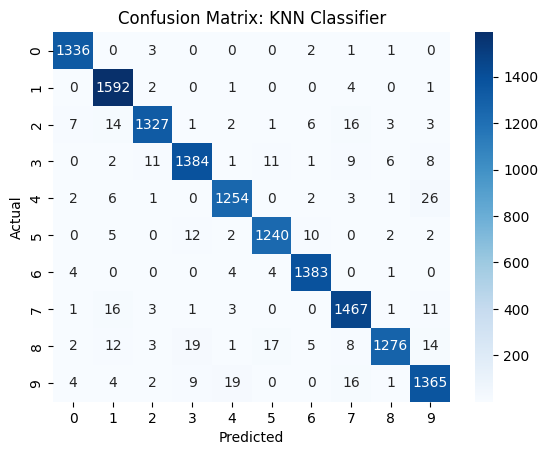

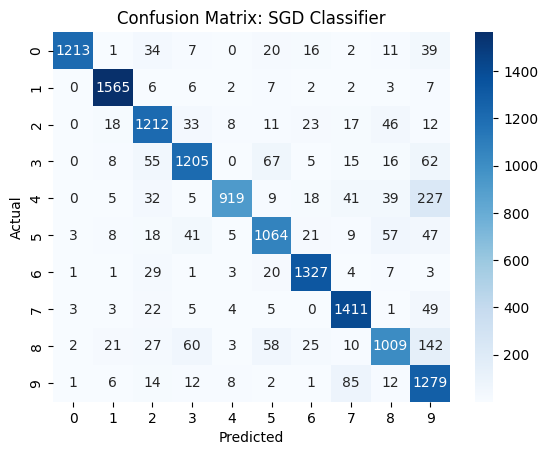

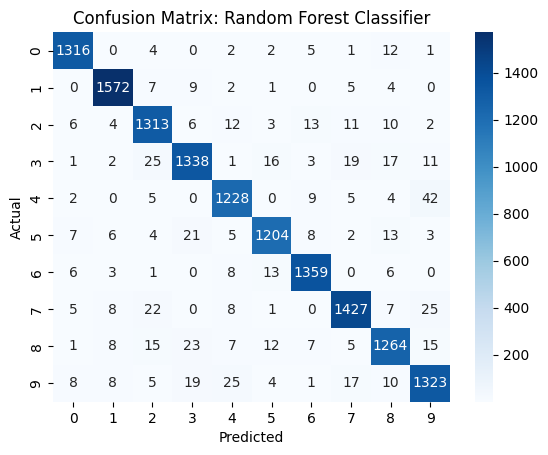

In [54]:
plot_confusion_matrix(y_test, y_knn_best_model_pred, "KNN Classifier")
plot_confusion_matrix(y_test, y_sgd_best_model_pred, "SGD Classifier")
plot_confusion_matrix(y_test, y_forest_best_model_pred, "Random Forest Classifier")

## Training Curve

In [41]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
    plt.title(f'Learning Curve: {title}')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

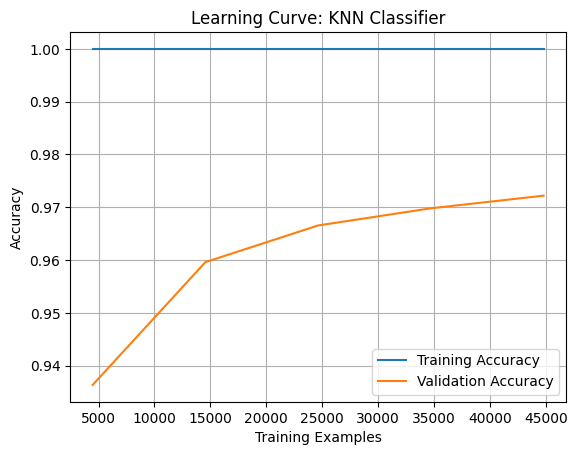

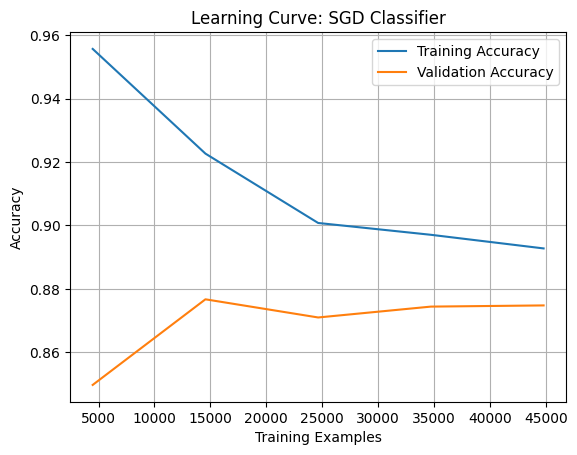

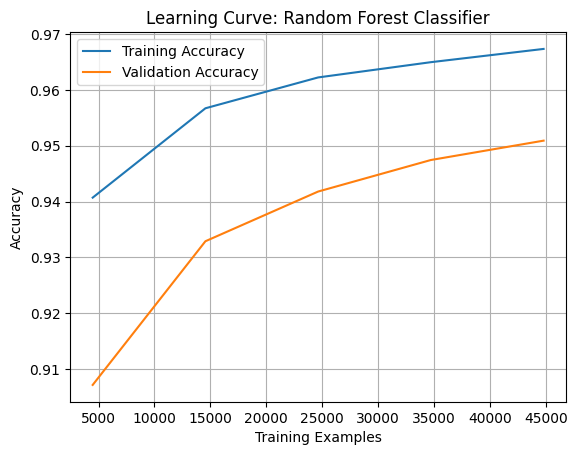

In [42]:
plot_learning_curve(knn_classifier, X_train, y_train, "KNN Classifier")
plot_learning_curve(sgd_classifier, X_train, y_train, "SGD Classifier")
plot_learning_curve(forest_classifier, X_train, y_train, "Random Forest Classifier")